In [1]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import ensemble
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
df_dk = pd.read_csv('data/cali_top5_reduced.csv')
df_cw = pd.read_csv('data/cali_top5_reduced_new.csv')
df_ah = pd.read_csv('data/data_final')

In [19]:
df_dk

,Date,RegionName,City,CountyName,Metro,avg_rent,female_19_under,female_20_to_29,female_30_to_39,female_40_to_64,...,dwellings_1_unit,dwellings_2_to_49_units,dwellings_50_or_more_units,commuters_by_public_transportation,commuters_walked_to_work,households_public_asst_or_food_stamps,households,housing_built_1939_or_earlier,housing_built_2000_to_2004,housing_built_2005_or_later
0,2013,94109,San Francisco,San Francisco County,San Francisco-Oakland-Hayward,3747.083333,0.038311,0.146598,0.098579,0.126137,...,0.034844,0.684668,0.278480,0.225616,0.146130,0.050412,0.600965,0.603528,0.032754,0.000434
1,2013,90250,Hawthorne,Los Angeles County,Los Angeles-Long Beach-Anaheim,2309.416667,0.141179,0.092272,0.081878,0.150967,...,0.396214,0.482022,0.112963,0.030268,0.007915,0.112307,0.334021,0.045571,0.024835,0.003707
2,2013,94565,Pittsburg,Contra Costa County,San Francisco-Oakland-Hayward,1716.500000,0.152650,0.078430,0.076342,0.157626,...,0.744611,0.159649,0.046235,0.038444,0.004721,0.144126,0.301587,0.033123,0.155913,0.008981
3,2013,90046,Los Angeles,Los Angeles County,Los Angeles-Long Beach-Anaheim,2799.833333,0.043882,0.113052,0.103982,0.136933,...,0.223698,0.626109,0.149614,0.028080,0.025149,0.028404,0.568883,0.216238,0.028971,0.007974
4,2013,94501,Alameda,Alameda County,San Francisco-Oakland-Hayward,2352.833333,0.101738,0.060140,0.089408,0.187787,...,0.448450,0.458972,0.089481,0.077045,0.024595,0.071663,0.400250,0.417777,0.050711,0.001194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4579,2018,93562,Trona,San Bernardino County,Riverside-San Bernardino-Ontario,1170.500000,0.128265,0.032501,0.060360,0.174115,...,0.912594,0.067669,0.005639,0.002902,0.009286,0.189153,0.438770,0.209586,0.000000,0.000000
4580,2018,96142,Tahoma,El Dorado County,Sacramento--Roseville--Arden-Arcade,2112.500000,0.126394,0.030979,0.054523,0.208178,...,0.931163,0.068837,0.000000,0.009913,0.000000,0.024242,0.408922,0.067442,0.000000,0.000000
4581,2018,92333,Fawnskin,San Bernardino County,Riverside-San Bernardino-Ontario,1328.333333,0.000000,0.000000,0.000000,0.126582,...,0.983333,0.016667,0.000000,0.000000,0.000000,0.029070,0.544304,0.243750,0.051042,0.000000
4582,2018,96148,Tahoe Vista,Placer County,Sacramento--Roseville--Arden-Arcade,2276.583333,0.087644,0.084770,0.099138,0.089080,...,0.814400,0.073600,0.000000,0.056034,0.027299,0.052381,0.301724,0.083200,0.000000,0.000000


In [20]:
df_cw

,Unnamed: 0,year,zipcode,City,CountyName,Metro,avg_rent,female_19_under,female_20_to_29,female_30_to_39,...,housing_built_1939_or_earlier,housing_built_2000_to_2004,housing_built_2005_or_later,N_returns_real_estate_taxes,Real_estate_taxes_amount,N_returns_mortgage_interest_paid,Mortgage_interest_paid_amount,rank_gini_index,gini_index_pct_change,gen_rank
0,0,2013.0,94109.0,San Francisco,San Francisco County,San Francisco-Oakland-Hayward,3747.083333,0.038311,0.146598,0.098579,...,0.603528,0.032754,0.000434,4190.0,36728.0,3260.0,48733.0,681.0,-0.025946,533.000000
1,1,2013.0,90250.0,Hawthorne,Los Angeles County,Los Angeles-Long Beach-Anaheim,2309.416667,0.141179,0.092272,0.081878,...,0.045571,0.024835,0.003707,7170.0,28425.0,6790.0,78165.0,313.0,0.013747,232.000000
2,2,2013.0,94565.0,Pittsburg,Contra Costa County,San Francisco-Oakland-Hayward,1716.500000,0.152650,0.078430,0.076342,...,0.033123,0.155913,0.008981,9480.0,28981.0,9230.0,97296.0,170.0,0.025617,183.333333
3,3,2013.0,90046.0,Los Angeles,Los Angeles County,Los Angeles-Long Beach-Anaheim,2799.833333,0.043882,0.113052,0.103982,...,0.216238,0.028971,0.007974,4830.0,38636.0,4180.0,74444.0,389.0,0.007562,392.000000
4,4,2013.0,94501.0,Alameda,Alameda County,San Francisco-Oakland-Hayward,2352.833333,0.101738,0.060140,0.089408,...,0.417777,0.050711,0.001194,8360.0,50589.0,7280.0,100254.0,49.0,0.046343,336.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6167,6167,2012.0,94506.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,740.0,-0.048296,739.333333
6168,6168,2012.0,92624.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,722.0,-0.032734,743.666667
6169,6169,2012.0,92356.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,747.0,-0.060294,747.333333
6170,6170,2012.0,92391.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,764.0,-0.403960,763.333333


In [21]:
df_ah = df_ah.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'name'])

In [6]:
len(df_dk.RegionName.unique())

764

In [7]:
len(df_ah.zipcode.unique())

765

In [8]:
len(df_cw.zipcode.unique())

765

In [22]:
df_ah = df_ah.dropna(subset=['City'])

In [10]:
len(df_ah.zipcode.unique())

764

In [23]:
df_ah

,year,zipcode,City,CountyName,Metro,avg_rent,female_19_under,female_20_to_29,female_30_to_39,female_40_to_64,...,Real_estate_taxes_amount,N_returns_mortgage_interest_paid,Mortgage_interest_paid_amount,rank_gini_index,gini_index_pct_change,gen_rank,CSBA,permits_total,permits_multifamilies,permits_singlefamily
0,2013.0,94109.0,San Francisco,San Francisco County,San Francisco-Oakland-Hayward,3747.083333,0.038311,0.146598,0.098579,0.126137,...,36728.0,3260.0,48733.0,681.0,-0.025946,533.000000,41860.0,10922.0,7263.0,3659.0
1,2013.0,90250.0,Hawthorne,Los Angeles County,Los Angeles-Long Beach-Anaheim,2309.416667,0.141179,0.092272,0.081878,0.150967,...,28425.0,6790.0,78165.0,313.0,0.013747,232.000000,31080.0,25198.0,17689.0,7509.0
2,2013.0,94565.0,Pittsburg,Contra Costa County,San Francisco-Oakland-Hayward,1716.500000,0.152650,0.078430,0.076342,0.157626,...,28981.0,9230.0,97296.0,170.0,0.025617,183.333333,41860.0,10922.0,7263.0,3659.0
3,2013.0,90046.0,Los Angeles,Los Angeles County,Los Angeles-Long Beach-Anaheim,2799.833333,0.043882,0.113052,0.103982,0.136933,...,38636.0,4180.0,74444.0,389.0,0.007562,392.000000,31080.0,25198.0,17689.0,7509.0
4,2013.0,94501.0,Alameda,Alameda County,San Francisco-Oakland-Hayward,2352.833333,0.101738,0.060140,0.089408,0.187787,...,50589.0,7280.0,100254.0,49.0,0.046343,336.666667,41860.0,10922.0,7263.0,3659.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4579,2018.0,93562.0,Trona,San Bernardino County,Riverside-San Bernardino-Ontario,1170.500000,0.128265,0.032501,0.060360,0.174115,...,0.0,0.0,0.0,760.0,-0.103462,509.333333,40140.0,14809.0,3218.0,11591.0
4580,2018.0,96142.0,Tahoma,El Dorado County,Sacramento--Roseville--Arden-Arcade,2112.500000,0.126394,0.030979,0.054523,0.208178,...,NaN,NaN,NaN,68.0,0.038766,276.666667,40900.0,7873.0,1480.0,6393.0
4581,2018.0,92333.0,Fawnskin,San Bernardino County,Riverside-San Bernardino-Ontario,1328.333333,0.000000,0.000000,0.000000,0.126582,...,NaN,NaN,NaN,NaN,NaN,NaN,40140.0,14809.0,3218.0,11591.0
4582,2018.0,96148.0,Tahoe Vista,Placer County,Sacramento--Roseville--Arden-Arcade,2276.583333,0.087644,0.084770,0.099138,0.089080,...,NaN,NaN,NaN,120.0,0.024384,292.333333,40900.0,7873.0,1480.0,6393.0


In [24]:
(df_ah.zipcode != df_dk.RegionName).sum()

0

In [25]:
# Ok great. looks like the important things match up now that I've removed the NAs for City
# Let's take a look at the missing data
df_ah.isna().sum().sort_values(ascending=False).head(10)

N_returns_mortgage_interest_paid    60
Mortgage_interest_paid_amount       60
Real_estate_taxes_amount            60
N_returns_real_estate_taxes         60
gen_rank                            12
gini_index_pct_change                2
rank_gini_index                      2
hispanic_pop                         0
dwellings_2_to_49_units              0
dwellings_1_unit                     0
dtype: int64

In [ ]:
# Not as bad as I thought. Great. Now what? Add the lags? 

In [38]:
targets = pd.read_csv('~/Downloads/Zip_ZORI_AllHomesPlusMultifamily_Smoothed.csv')

In [39]:
targets

,RegionID,RegionName,SizeRank,MsaName,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,...,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11
0,61639,10025,1,"New York, NY",2923.0,2849.0,2933.0,2957.0,2948.0,2955.0,...,2782.0,2850.0,2908.0,2992.0,3055.0,3140.0,3212.0,3235.0,3295.0,3335.0
1,84654,60657,2,"Chicago, IL",1213.0,1239.0,1240.0,1247.0,1262.0,1291.0,...,1400.0,1403.0,1405.0,1420.0,1426.0,1430.0,1448.0,1445.0,1440.0,1454.0
2,61637,10023,3,"New York, NY",3250.0,3272.0,3313.0,3304.0,3324.0,3386.0,...,3059.0,3091.0,3173.0,3227.0,3325.0,3431.0,3516.0,3642.0,3741.0,3738.0
3,91982,77494,4,"Houston, TX",1308.0,1367.0,1373.0,1380.0,1356.0,1345.0,...,1354.0,1357.0,1380.0,1408.0,1469.0,1510.0,1531.0,1534.0,1556.0,1577.0
4,84616,60614,5,"Chicago, IL",1498.0,1521.0,1531.0,1543.0,1562.0,1577.0,...,1699.0,1736.0,1780.0,1802.0,1821.0,1824.0,1859.0,1834.0,1847.0,1861.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2141,96956,92624,7944,"Los Angeles-Long Beach-Anaheim, CA",7481.0,NaN,NaN,NaN,4029.0,3721.0,...,5542.0,5354.0,NaN,5656.0,5710.0,6477.0,6439.0,NaN,NaN,6649.0
2142,95039,85701,8456,"Tucson, AZ",NaN,929.0,906.0,874.0,875.0,888.0,...,1231.0,1200.0,1233.0,1256.0,1252.0,1367.0,1415.0,1432.0,1359.0,1329.0
2143,84608,60606,8497,"Chicago, IL",2107.0,2099.0,2126.0,2142.0,2152.0,2204.0,...,1991.0,2060.0,2161.0,2248.0,2348.0,2380.0,2427.0,2317.0,2269.0,2205.0
2144,61620,10006,8506,"New York, NY",2717.0,2745.0,2770.0,2793.0,2856.0,2884.0,...,2504.0,2491.0,2583.0,2616.0,2738.0,2821.0,2981.0,3053.0,3131.0,3152.0


In [43]:
len(set(df_ah.zipcode))

764

In [49]:
len(set(df_ah.zipcode).intersection(list(set(targets.RegionName))))

340

In [ ]:
# Ok so it doesn't make sense to use the zillow dataset from the website because it only has about 
# half of the zipcodes we need. We could potentially use it for validation of more forward predictions though. 
# nah I compared the two datasets and it looks the the values for the same zipcode and year are totally different
# We would need some crazy methods to combine them. Now is not the time. 

In [50]:
targets = pd.read_csv('year_avgs.csv').drop(columns='Unnamed: 0')
targets

,geo_id,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,10025,3033.75,2864.666667,2967.000000,3144.666667,3274.375000,3849.875000,4166.714286,4219.333333,3532.000000,3804.333333,NaN
1,60657,1783.75,1787.250000,1866.833333,1955.666667,2005.666667,2073.500000,2140.416667,2127.416667,2098.333333,2085.545455,1996.0
2,10023,3303.75,3074.250000,3073.833333,3198.250000,3322.250000,4153.600000,4670.375000,4032.333333,3835.125000,3960.222222,NaN
3,77494,1554.00,1584.500000,1630.583333,1786.833333,1956.833333,1921.916667,1819.833333,1770.083333,1788.166667,1763.416667,1778.0
4,60614,1919.00,1897.583333,2014.666667,2148.000000,2202.583333,2271.000000,2346.500000,2344.000000,2314.250000,2306.583333,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
13176,26291,946.00,957.272727,949.545455,979.272727,949.363636,1036.333333,1021.583333,949.666667,918.416667,952.250000,923.0
13177,12720,1399.00,1200.125000,1152.181818,1200.166667,1209.750000,1134.363636,1196.500000,1181.416667,1261.250000,1295.181818,1272.0
13178,26209,NaN,NaN,NaN,NaN,692.200000,769.000000,732.666667,762.666667,766.727273,739.888889,765.0
13179,41101,758.25,782.333333,846.083333,832.750000,836.166667,846.916667,865.083333,851.666667,855.916667,846.000000,815.0


In [52]:
merged = pd.merge(df_ah, targets, left_on='zipcode', right_on='geo_id')
merged.year = merged.year.astype(int)
merged.zipcode = merged.zipcode.astype(int)
merged

,year,zipcode,City,CountyName,Metro,avg_rent,female_19_under,female_20_to_29,female_30_to_39,female_40_to_64,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,2013,94109,San Francisco,San Francisco County,San Francisco-Oakland-Hayward,3747.083333,0.038311,0.146598,0.098579,0.126137,...,3135.416667,3375.500000,3747.083333,4123.250000,4520.250000,4492.916667,4231.416667,4245.916667,4421.083333,4406.0
1,2014,94109,San Francisco,San Francisco County,San Francisco-Oakland-Hayward,4123.250000,0.028940,0.141141,0.097703,0.127501,...,3135.416667,3375.500000,3747.083333,4123.250000,4520.250000,4492.916667,4231.416667,4245.916667,4421.083333,4406.0
2,2015,94109,San Francisco,San Francisco County,San Francisco-Oakland-Hayward,4520.250000,0.029400,0.135949,0.105821,0.123141,...,3135.416667,3375.500000,3747.083333,4123.250000,4520.250000,4492.916667,4231.416667,4245.916667,4421.083333,4406.0
3,2016,94109,San Francisco,San Francisco County,San Francisco-Oakland-Hayward,4492.916667,0.027901,0.146379,0.105018,0.120388,...,3135.416667,3375.500000,3747.083333,4123.250000,4520.250000,4492.916667,4231.416667,4245.916667,4421.083333,4406.0
4,2017,94109,San Francisco,San Francisco County,San Francisco-Oakland-Hayward,4231.416667,0.026190,0.131302,0.108329,0.122007,...,3135.416667,3375.500000,3747.083333,4123.250000,4520.250000,4492.916667,4231.416667,4245.916667,4421.083333,4406.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4579,2014,92341,Green Valley Lake,San Bernardino County,Riverside-San Bernardino-Ontario,1186.333333,0.044218,0.000000,0.000000,0.214286,...,1175.833333,1172.916667,1129.454545,1186.333333,1238.666667,1308.666667,1414.833333,1456.000000,1332.454545,1356.0
4580,2015,92341,Green Valley Lake,San Bernardino County,Riverside-San Bernardino-Ontario,1238.666667,0.045296,0.000000,0.000000,0.216028,...,1175.833333,1172.916667,1129.454545,1186.333333,1238.666667,1308.666667,1414.833333,1456.000000,1332.454545,1356.0
4581,2016,92341,Green Valley Lake,San Bernardino County,Riverside-San Bernardino-Ontario,1308.666667,0.051948,0.000000,0.000000,0.207792,...,1175.833333,1172.916667,1129.454545,1186.333333,1238.666667,1308.666667,1414.833333,1456.000000,1332.454545,1356.0
4582,2017,92341,Green Valley Lake,San Bernardino County,Riverside-San Bernardino-Ontario,1414.833333,0.056034,0.000000,0.000000,0.176724,...,1175.833333,1172.916667,1129.454545,1186.333333,1238.666667,1308.666667,1414.833333,1456.000000,1332.454545,1356.0


In [53]:
for i in range(merged.shape[0]):
    year = int(merged.loc[i, 'year'])
    if (year+1) in range(2010, 2021):
        merged.loc[i, 'rent_in_1y'] = merged.loc[i, str(year+1)]
    if (year+2) in range(2010, 2021):
        merged.loc[i, 'rent_in_2y'] = merged.loc[i, str(year+2)]
    if (year+3) in range(2010, 2021):
        merged.loc[i, 'rent_in_3y'] = merged.loc[i, str(year+3)]
    if (year+4) in range(2010, 2021):
        merged.loc[i, 'rent_in_4y'] = merged.loc[i, str(year+4)]
    if (year+5) in range(2010, 2021):
        merged.loc[i, 'rent_in_5y'] = merged.loc[i, str(year+5)]

In [54]:
merged

,year,zipcode,City,CountyName,Metro,avg_rent,female_19_under,female_20_to_29,female_30_to_39,female_40_to_64,...,2016,2017,2018,2019,2020,rent_in_1y,rent_in_2y,rent_in_3y,rent_in_4y,rent_in_5y
0,2013,94109,San Francisco,San Francisco County,San Francisco-Oakland-Hayward,3747.083333,0.038311,0.146598,0.098579,0.126137,...,4492.916667,4231.416667,4245.916667,4421.083333,4406.0,4123.250000,4520.250000,4492.916667,4231.416667,4245.916667
1,2014,94109,San Francisco,San Francisco County,San Francisco-Oakland-Hayward,4123.250000,0.028940,0.141141,0.097703,0.127501,...,4492.916667,4231.416667,4245.916667,4421.083333,4406.0,4520.250000,4492.916667,4231.416667,4245.916667,4421.083333
2,2015,94109,San Francisco,San Francisco County,San Francisco-Oakland-Hayward,4520.250000,0.029400,0.135949,0.105821,0.123141,...,4492.916667,4231.416667,4245.916667,4421.083333,4406.0,4492.916667,4231.416667,4245.916667,4421.083333,4406.000000
3,2016,94109,San Francisco,San Francisco County,San Francisco-Oakland-Hayward,4492.916667,0.027901,0.146379,0.105018,0.120388,...,4492.916667,4231.416667,4245.916667,4421.083333,4406.0,4231.416667,4245.916667,4421.083333,4406.000000,NaN
4,2017,94109,San Francisco,San Francisco County,San Francisco-Oakland-Hayward,4231.416667,0.026190,0.131302,0.108329,0.122007,...,4492.916667,4231.416667,4245.916667,4421.083333,4406.0,4245.916667,4421.083333,4406.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4579,2014,92341,Green Valley Lake,San Bernardino County,Riverside-San Bernardino-Ontario,1186.333333,0.044218,0.000000,0.000000,0.214286,...,1308.666667,1414.833333,1456.000000,1332.454545,1356.0,1238.666667,1308.666667,1414.833333,1456.000000,1332.454545
4580,2015,92341,Green Valley Lake,San Bernardino County,Riverside-San Bernardino-Ontario,1238.666667,0.045296,0.000000,0.000000,0.216028,...,1308.666667,1414.833333,1456.000000,1332.454545,1356.0,1308.666667,1414.833333,1456.000000,1332.454545,1356.000000
4581,2016,92341,Green Valley Lake,San Bernardino County,Riverside-San Bernardino-Ontario,1308.666667,0.051948,0.000000,0.000000,0.207792,...,1308.666667,1414.833333,1456.000000,1332.454545,1356.0,1414.833333,1456.000000,1332.454545,1356.000000,NaN
4582,2017,92341,Green Valley Lake,San Bernardino County,Riverside-San Bernardino-Ontario,1414.833333,0.056034,0.000000,0.000000,0.176724,...,1308.666667,1414.833333,1456.000000,1332.454545,1356.0,1456.000000,1332.454545,1356.000000,NaN,NaN


In [17]:
merged = merged.drop(columns=['geo_id', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'])
merged

NameError: name 'merged' is not defined

In [57]:
merged.to_csv('data/data_final_w_lagged_targets_kpl.csv', index=False)

In [26]:
df = pd.read_csv('data/data_final_w_lagged_targets_kpl.csv')

In [27]:
df2 = df.drop(columns=['zipcode', 'City', 'CountyName', 'Metro', 
                       'rent_in_2y', 'rent_in_3y', 'rent_in_4y', 'rent_in_5y'])
df2.isna().sum().sort_values(ascending=False).head(10)

N_returns_real_estate_taxes         60
Real_estate_taxes_amount            60
N_returns_mortgage_interest_paid    60
Mortgage_interest_paid_amount       60
gen_rank                            12
rent_in_1y                           5
gini_index_pct_change                2
rank_gini_index                      2
commuters_walked_to_work             0
white_pop                            0
dtype: int64

In [28]:
df2 = df2.dropna()
df2

,year,avg_rent,female_19_under,female_20_to_29,female_30_to_39,female_40_to_64,female_64_over,male_19_under,male_20_to_29,male_30_to_39,...,N_returns_mortgage_interest_paid,Mortgage_interest_paid_amount,rank_gini_index,gini_index_pct_change,gen_rank,CSBA,permits_total,permits_multifamilies,permits_singlefamily,rent_in_1y
0,2013,3747.083333,0.038311,0.146598,0.098579,0.126137,0.088690,0.036762,0.108071,0.115852,...,3260.0,48733.0,681.0,-0.025946,533.000000,41860.0,10922.0,7263.0,3659.0,4123.250000
1,2014,4123.250000,0.028940,0.141141,0.097703,0.127501,0.080996,0.036938,0.109005,0.130222,...,3190.0,47822.0,474.0,0.000750,254.333333,41860.0,10001.0,6285.0,3716.0,4520.250000
2,2015,4520.250000,0.029400,0.135949,0.105821,0.123141,0.082728,0.035919,0.106443,0.137299,...,3230.0,48895.0,315.0,0.010684,239.666667,41860.0,13386.0,8582.0,4804.0,4492.916667
3,2016,4492.916667,0.027901,0.146379,0.105018,0.120388,0.084793,0.033846,0.103072,0.138453,...,3210.0,47713.0,299.0,0.010200,303.333333,41860.0,14787.0,9820.0,4967.0,4231.416667
4,2017,4231.416667,0.026190,0.131302,0.108329,0.122007,0.085002,0.039514,0.099599,0.146801,...,3370.0,51307.0,578.0,-0.013035,346.666667,41860.0,16952.0,12175.0,4777.0,4245.916667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4557,2016,1044.416667,0.119136,0.054938,0.056173,0.156790,0.082099,0.196296,0.043827,0.040741,...,40.0,182.0,698.0,-0.028363,663.000000,40140.0,10921.0,2084.0,8837.0,1036.700000
4558,2017,1036.700000,0.143990,0.052471,0.065284,0.150092,0.086638,0.164124,0.045149,0.037828,...,50.0,185.0,56.0,0.036489,481.666667,40140.0,14676.0,3721.0,10955.0,1170.500000
4559,2018,1170.500000,0.128265,0.032501,0.060360,0.174115,0.089379,0.174695,0.039466,0.048752,...,0.0,0.0,760.0,-0.103462,509.333333,40140.0,14809.0,3218.0,11591.0,1216.727273
4563,2016,2043.272727,0.129243,0.079634,0.066580,0.218016,0.057441,0.159269,0.000000,0.060052,...,80.0,958.0,762.0,-0.088000,651.000000,40900.0,7204.0,1069.0,6135.0,2094.800000


In [29]:
X = df2.drop(columns='rent_in_1y')
y = df2.rent_in_1y

In [88]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [50]:
max_vif = np.inf
X_new = X.copy()
while max_vif > 5:
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]
    vif["features"] = X_new.columns
    max_vif = vif.sort_values(by='VIF Factor', ascending=False).reset_index(drop=True).loc[0, 'VIF Factor']
    max_feat = vif.sort_values(by='VIF Factor', ascending=False).reset_index(drop=True).loc[0, 'features']
    if max_vif > 5:
        print('Removing ' + max_feat + ' with vif = ' + str(max_vif))
        X_new = X_new.drop(columns=max_feat)

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Removing permits_singlefamily with vif = inf
Removing households with vif = inf
Removing year with vif = 181532.86244069695
Removing dwellings_1_unit with vif = 5993.435572276584
Removing N_returns_real_estate_taxes with vif = 1057.3153840389803
Removing white_pop with vif = 778.2152672093204
Removing CSBA with vif = 703.8385835133572
Removing permits_total with vif = 155.133342825175
Removing female_40_to_64 with vif = 114.2054142895253
Removing Mortgage_interest_paid_amount with vif = 106.73598990807045
Removing income_40000_99999 with vif = 87.15325095382833
Removing housing_units with vif = 79.80561517303488
Removing male_19_under with vif = 77.26949408049708
Removing commute_30_mins_less with vif = 69.92486854643509
Removing degree_bachelors with vif = 65.49968871331005
Removing female_30_to_39 with vif = 56.37883258326755
Removing avg_rent with vif = 51.20123192670315
Removing male_64_over with vif = 44.834674602518675
Removing income_100000_199999 with vif = 40.4029974624799
Rem

In [44]:
X_vif_5 = X_new
X_vif_5_w_avg_rent = X_vif_5
X_vif_5_w_avg_rent['avg_rent'] = X.avg_rent

In [45]:
X_vif_5_w_avg_rent

,commute_30_to_59,commute_60_more_mins,income_200000_or_more,mobile_homes,vacant_housing_units,vacant_housing_units_for_rent,amerindian_pop,asian_pop,black_pop,other_race_pop,...,commuters_by_public_transportation,commuters_walked_to_work,households_public_asst_or_food_stamps,housing_built_1939_or_earlier,housing_built_2000_to_2004,housing_built_2005_or_later,Real_estate_taxes_amount,gini_index_pct_change,permits_multifamilies,avg_rent
0,0.179956,0.064014,0.070282,0.001031,0.094573,0.029824,0.000522,0.279346,0.033592,0.015526,...,0.225616,0.146130,0.050412,0.603528,0.032754,0.000434,36728.0,-0.025946,7263.0,3747.083333
1,0.185181,0.069438,0.077527,0.000550,0.093502,0.023603,0.000292,0.271838,0.040553,0.010572,...,0.232818,0.151987,0.057992,0.592017,0.038842,0.000413,39773.0,0.000750,6285.0,4123.250000
2,0.192102,0.075516,0.080703,0.000459,0.089852,0.018192,0.000231,0.267209,0.041604,0.009344,...,0.226582,0.156556,0.056226,0.047746,0.002969,0.000270,43679.0,0.010684,8582.0,4520.250000
3,0.200646,0.078795,0.092433,0.000430,0.094035,0.025758,0.000589,0.258930,0.039897,0.006159,...,0.232314,0.160874,0.055559,0.051033,0.004781,0.002471,48090.0,0.010200,9820.0,4492.916667
4,0.210702,0.073091,0.109760,0.000406,0.102923,0.030639,0.000424,0.255854,0.040115,0.006309,...,0.230017,0.177161,0.052332,0.046946,0.007464,0.002380,59023.0,-0.013035,12175.0,4231.416667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4557,0.054321,0.014198,0.008642,0.019943,0.332384,0.011396,0.002469,0.004321,0.056790,0.000000,...,0.000000,0.009259,0.162162,0.207028,0.000000,0.000000,88.0,-0.028363,2084.0,1044.416667
4558,0.059793,0.006101,0.012813,0.019380,0.296512,0.011628,0.003661,0.003051,0.061623,0.000000,...,0.003051,0.009762,0.246556,0.236434,0.000000,0.000000,92.0,0.036489,3721.0,1036.700000
4559,0.000000,0.011027,0.004063,0.014098,0.289474,0.010338,0.002322,0.022055,0.051654,0.000000,...,0.002902,0.009286,0.189153,0.209586,0.000000,0.000000,0.0,-0.103462,3218.0,1170.500000
4563,0.189295,0.000000,0.024804,0.000000,0.855561,0.007383,0.101828,0.011749,0.000000,0.000000,...,0.018277,0.006527,0.047923,0.074758,0.000000,0.000000,661.0,-0.088000,1069.0,2043.272727


In [43]:
# Let's train a linear model for both X and X_new
mlr = LinearRegression()
mlr_full = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
    mlr.fit(X_train, y_train)
    mlr_full.append(mlr.score(X_test, y_test))

In [42]:
mlr = LinearRegression()
mlr_vif_lt5 = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.25)
    mlr.fit(X_train, y_train)
    mlr_vif_lt5.append(mlr.score(X_test, y_test))

In [46]:
mlr = LinearRegression()
mlr_vif_lt5_rent = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X_vif_5_w_avg_rent, y, test_size = 0.25)
    mlr.fit(X_train, y_train)
    mlr_vif_lt5_rent.append(mlr.score(X_test, y_test))

In [40]:
mlr = LinearRegression()
mlr_vif_lt50 = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.25)
    mlr.fit(X_train, y_train)
    mlr_vif_lt50.append(mlr.score(X_test, y_test))

In [38]:
mlr = LinearRegression()
mlr_vif_lt55 = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.25)
    mlr.fit(X_train, y_train)
    mlr_vif_lt55.append(mlr.score(X_test, y_test))

In [36]:
mlr = LinearRegression()
mlr_vif_lt60 = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.25)
    mlr.fit(X_train, y_train)
    mlr_vif_lt60.append(mlr.score(X_test, y_test))

In [34]:
mlr = LinearRegression()
mlr_vif_lt75 = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.25)
    mlr.fit(X_train, y_train)
    mlr_vif_lt75.append(mlr.score(X_test, y_test))

In [31]:
mlr = LinearRegression()
mlr_vif_lt100 = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.25)
    mlr.fit(X_train, y_train)
    mlr_vif_lt100.append(mlr.score(X_test, y_test))

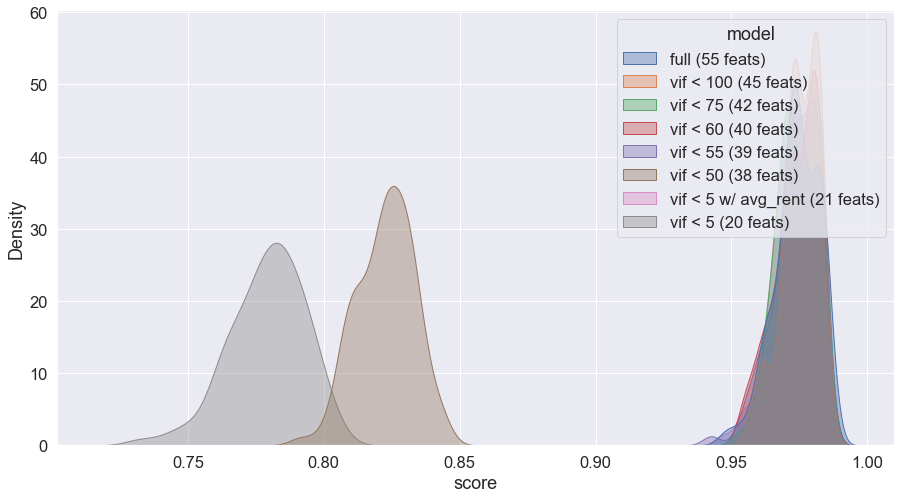

In [66]:
scores = pd.concat([pd.DataFrame({'score':mlr_full,'model':'full (55 feats)'})
                    ,pd.DataFrame({'score':mlr_vif_lt100,'model':'vif < 100 (45 feats)'})
                    ,pd.DataFrame({'score':mlr_vif_lt75,'model':'vif < 75 (42 feats)'})
                    ,pd.DataFrame({'score':mlr_vif_lt60,'model':'vif < 60 (40 feats)'})
                    ,pd.DataFrame({'score':mlr_vif_lt55,'model':'vif < 55 (39 feats)'})
                    ,pd.DataFrame({'score':mlr_vif_lt50,'model':'vif < 50 (38 feats)'})
                    ,pd.DataFrame({'score':mlr_vif_lt5_rent,'model':'vif < 5 w/ avg_rent (21 feats)'})
                    ,pd.DataFrame({'score':mlr_vif_lt5,'model':'vif < 5 (20 feats)'})
                   ])
sns.set(rc = {'figure.figsize':(15,8)})
sns.set(font_scale = 1.5)
g = sns.kdeplot(data=scores, x="score", hue="model", fill=True, common_norm=False, alpha=0.4)
#plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)

In [210]:
np.mean(mlr_vif_lt5_rent)

0.9746443509947167

In [211]:
np.mean(mlr_full)

0.9752230145697165

In [216]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_vif_5_w_avg_rent.values, i) for i in range(X_vif_5_w_avg_rent.shape[1])]
vif["features"] = X_vif_5_w_avg_rent.columns
vif

,VIF Factor,features
0,5.016035,commute_30_to_59
1,5.107047,commute_60_more_mins
2,7.760481,income_200000_or_more
3,1.810837,mobile_homes
4,2.536101,vacant_housing_units
5,4.025205,vacant_housing_units_for_rent
6,1.425192,amerindian_pop
7,2.668806,asian_pop
8,1.946600,black_pop
9,1.783804,other_race_pop


In [217]:
X_vif_5 = X_vif_5_w_avg_rent.drop(columns='avg_rent')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_vif_5.values, i) for i in range(X_vif_5.shape[1])]
vif["features"] = X_vif_5.columns
vif

,VIF Factor,features
0,4.759680,commute_30_to_59
1,4.846112,commute_60_more_mins
2,4.522751,income_200000_or_more
3,1.783331,mobile_homes
4,2.483709,vacant_housing_units
5,3.974002,vacant_housing_units_for_rent
6,1.424906,amerindian_pop
7,2.547456,asian_pop
8,1.946594,black_pop
9,1.765788,other_race_pop


# Lasso 🤠

In [245]:
X_train, X_test, y_train, y_test = train_test_split(X_vif5_w_rent, y, test_size=0.25)
# Setting max_iter because it doesn't coverge without it
lasso = Lasso(max_iter=10000, normalize=True)
alphas = np.linspace(0.05,0.55,41)
coefs_lasso = []
R2_train = []
R2_test = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)
    R2_train.append(lasso.score(X_train, y_train))
    R2_test.append(lasso.score(X_test, y_test))
    
    
coefs_lasso = pd.DataFrame(coefs_lasso, index = alphas, columns = X_train.columns)
R2_lasso = pd.DataFrame({'train': R2_train,'test':R2_test}, index = alphas)

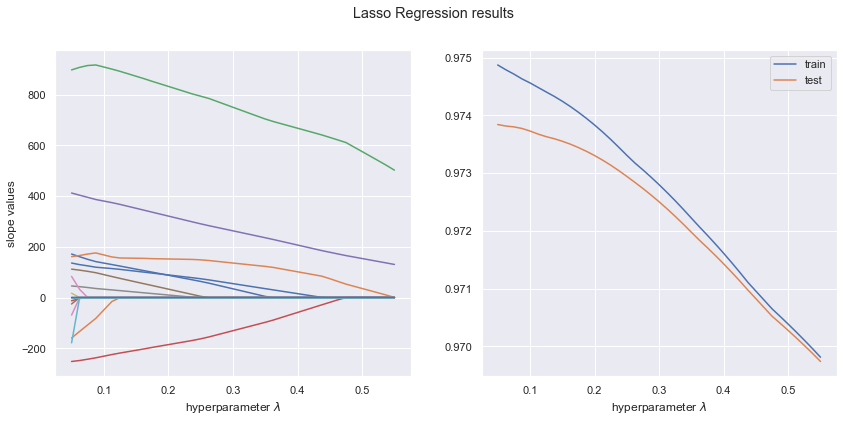

In [246]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
fig.suptitle('Lasso Regression results')

for feat in coefs_lasso.columns:
    ax1.plot(coefs_lasso.index, coefs_lasso[feat]) 
ax1.set_xlabel(r'hyperparameter $\lambda$')
ax1.set_ylabel(r'slope values')
#ax1.legend(loc=1)
for each in R2_lasso.columns:
    ax2.plot(R2_lasso.index, R2_lasso[each], label=each)
ax2.set_xlabel(r'hyperparameter $\lambda$')
ax2.legend(loc=1)

In [241]:
coefs_lasso = coefs_lasso.reset_index().rename(columns={'index':'alpha'})

In [243]:
coefs_lasso[coefs_lasso > 1000]

,alpha,commute_30_to_59,commute_60_more_mins,income_200000_or_more,mobile_homes,vacant_housing_units,vacant_housing_units_for_rent,amerindian_pop,asian_pop,black_pop,...,commuters_by_public_transportation,commuters_walked_to_work,households_public_asst_or_food_stamps,housing_built_1939_or_earlier,housing_built_2000_to_2004,housing_built_2005_or_later,Real_estate_taxes_amount,gini_index_pct_change,permits_multifamilies,avg_rent
0,NaN,NaN,NaN,1097.167039,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,1089.233173,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,1082.026232,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,1073.933997,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,1066.099338,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,1058.396023,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,1050.762811,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,1041.908733,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,1032.882272,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,1023.790252,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [223]:
# From here forward we will use three feature sets: 
X_full = X.copy()
X_vif5 = X_vif_5.copy()
X_vif5_w_rent = X_vif_5_w_avg_rent.copy()
X_vif5_w_rent.shape

(4517, 21)